In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway, f

import statsmodels.api as sm
from statsmodels.formula.api import ols 

import warnings
warnings.simplefilter('ignore')


from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
nba = pd.read_csv('C:/Users/doris/Documents/data_analytics/Final_Project/kmean_nba/nba_extra.csv')

In [4]:
nba

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,8,1134,115,291,...,0.848,26,88,114,28,38,8,25,124,353
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,8,1359,130,365,...,0.817,40,217,257,57,33,29,60,149,411
2,3,Steven Adams\adamsst01,C,24,OKC,76,76,2487,448,712,...,0.559,384,301,685,88,92,78,128,215,1056
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,1368,174,340,...,0.721,118,263,381,101,32,41,66,138,477
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,3,682,65,162,...,0.846,4,62,66,30,4,9,21,56,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,537,Tyler Zeller\zellety01,C,28,BRK,42,33,703,125,229,...,0.667,63,131,194,28,8,21,35,78,300
660,537,Tyler Zeller\zellety01,C,28,MIL,24,1,406,62,105,...,0.895,47,64,111,19,7,14,12,48,141
661,538,Paul Zipser\zipsepa01,SF,23,CHI,54,12,824,81,234,...,0.760,13,118,131,46,20,15,43,86,218
662,539,Ante Zizic\zizican01,C,21,CLE,32,2,214,49,67,...,0.724,24,36,60,5,2,13,11,30,119


In [5]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      664 non-null    int64  
 1   Player  664 non-null    object 
 2   Pos     664 non-null    object 
 3   Age     664 non-null    int64  
 4   Tm      664 non-null    object 
 5   G       664 non-null    int64  
 6   GS      664 non-null    int64  
 7   MP      664 non-null    int64  
 8   FG      664 non-null    int64  
 9   FGA     664 non-null    int64  
 10  FG%     660 non-null    float64
 11  3P      664 non-null    int64  
 12  3PA     664 non-null    int64  
 13  3P%     599 non-null    float64
 14  2P      664 non-null    int64  
 15  2PA     664 non-null    int64  
 16  2P%     646 non-null    float64
 17  eFG%    660 non-null    float64
 18  FT      664 non-null    int64  
 19  FTA     664 non-null    int64  
 20  FT%     606 non-null    float64
 21  ORB     664 non-null    int64  
 22  DR

In [6]:
nba.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        4
3P         0
3PA        0
3P%       65
2P         0
2PA        0
2P%       18
eFG%       4
FT         0
FTA        0
FT%       58
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [7]:
nba = nba.dropna()

In [8]:
cols = [col for col in pl.columns.values if col not in ['Rk', 'Pos', 'Player', 'Tm']]
print(len(cols), cols)

26 ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


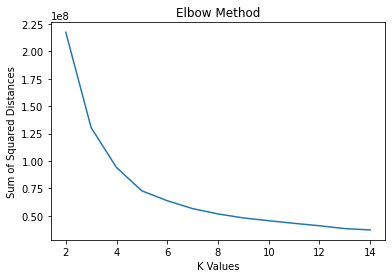

In [10]:
# Elbow Method - Funciona para identificar el número de posibles clusters

K = range(2, 15)
sum_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k).fit(nba[cols])
    sum_squared_distances.append(model.inertia_)

plt.plot(K, sum_squared_distances)
plt.xlabel('K Values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')

plt.show()

In [16]:
kmeans = KMeans(n_clusters=4, random_state=False)

nba_clusters = kmeans.fit(nba[cols])

In [17]:
nba_clusters.cluster_centers_

array([[2.68066667e+01, 6.15866667e+01, 1.75866667e+01, 1.24345333e+03,
        1.76253333e+02, 3.89033333e+02, 4.55960000e-01, 4.77000000e+01,
        1.35613333e+02, 3.20100000e-01, 1.28553333e+02, 2.53420000e+02,
        5.03160000e-01, 5.16286667e-01, 6.89133333e+01, 9.22666667e+01,
        7.49346667e-01, 5.02866667e+01, 1.60533333e+02, 2.10820000e+02,
        1.12113333e+02, 3.90533333e+01, 2.41533333e+01, 6.44200000e+01,
        1.11680000e+02, 4.69120000e+02],
       [2.65511811e+01, 7.16299213e+01, 5.05748031e+01, 2.00243307e+03,
        3.35000000e+02, 7.32102362e+02, 4.58511811e-01, 1.00181102e+02,
        2.68779528e+02, 3.46960630e-01, 2.34818898e+02, 4.63322835e+02,
        5.03409449e-01, 5.27433071e-01, 1.32275591e+02, 1.69307087e+02,
        7.81685039e-01, 7.11732283e+01, 2.73314961e+02, 3.44488189e+02,
        1.90125984e+02, 6.49527559e+01, 3.54173228e+01, 1.10968504e+02,
        1.51952756e+02, 9.02456693e+02],
       [2.56775510e+01, 2.41673469e+01, 3.22448980e+00

In [18]:
predict = nba_clusters.fit_predict(nba[cols])

In [19]:
nba['cluster_kmeans_1'] = predict
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,cluster_kmeans_1
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,8,1134,115,291,...,26,88,114,28,38,8,25,124,353,0
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,8,1359,130,365,...,40,217,257,57,33,29,60,149,411,0
2,3,Steven Adams\adamsst01,C,24,OKC,76,76,2487,448,712,...,384,301,685,88,92,78,128,215,1056,1
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,1368,174,340,...,118,263,381,101,32,41,66,138,477,0
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,3,682,65,162,...,4,62,66,30,4,9,21,56,179,2


In [20]:
nba.cluster_kmeans_1.unique()

array([0, 1, 2, 3])

In [21]:
cluster_0  = nba[nba['cluster_kmeans_1'] == 0]
cluster_0.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,cluster_kmeans_1
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,8,1134,115,291,...,26,88,114,28,38,8,25,124,353,0
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,8,1359,130,365,...,40,217,257,57,33,29,60,149,411,0
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,1368,174,340,...,118,263,381,101,32,41,66,138,477,0
7,8,Jarrett Allen\allenja01,C,19,BRK,72,31,1441,234,397,...,144,244,388,49,28,88,82,147,587,0
13,14,Ryan Anderson\anderry01,PF,29,HOU,66,50,1725,207,480,...,94,237,331,60,24,21,42,126,617,0


In [22]:
cluster_0['Player'].unique()

array(['Alex Abrines\\abrinal01', 'Quincy Acy\\acyqu01',
       'Bam Adebayo\\adebaba01', 'Jarrett Allen\\allenja01',
       'Ryan Anderson\\anderry01', 'OG Anunoby\\anunoog01',
       'Jerryd Bayless\\bayleje01', 'Aron Baynes\\baynear01',
       'Marco Belinelli\\belinma01', 'Jordan Bell\\belljo01',
       'Davis Bertans\\bertada01', 'Bismack Biyombo\\biyombi01',
       'Nemanja Bjelica\\bjeline01', 'Trevor Booker\\booketr01',
       'Avery Bradley\\bradlav01', 'Corey Brewer\\breweco01',
       'Malcolm Brogdon\\brogdma01', 'Trey Burke\\burketr01',
       'Alec Burks\\burksal01', 'Jose Calderon\\caldejo01',
       'Vince Carter\\cartevi01', 'Michael Carter-Williams\\cartemi01',
       'Mario Chalmers\\chalmma01', 'Marquese Chriss\\chrisma01',
       'Ian Clark\\clarkia01', 'Jordan Clarkson\\clarkjo01',
       'Zach Collins\\colliza01', 'Pat Connaughton\\connapa01',
       'Jae Crowder\\crowdja01', 'Dante Cunningham\\cunnida01',
       'Troy Daniels\\danietr01', 'Ed Davis\\davised01',


In [23]:
nba['cluster_kmeans_1'].value_counts()

2    245
0    150
1    127
3     39
Name: cluster_kmeans_1, dtype: int64

In [24]:
nba.groupby(['cluster_kmeans_1']).agg({'PTS': 'mean'})

,PTS
cluster_kmeans_1,
0,469.120000
1,902.456693
2,121.861224
3,1582.333333


In [25]:
nba.groupby(['cluster_kmeans_1']).agg({'AST': 'mean'})

,AST
cluster_kmeans_1,
0,112.113333
1,190.125984
2,26.885714
3,333.974359


In [26]:
nba.groupby(['cluster_kmeans_1']).agg({'TRB': 'mean'})

,TRB
cluster_kmeans_1,
0,210.820000
1,344.488189
2,55.644898
3,505.128205


In [27]:
nba.groupby(['cluster_kmeans_1']).agg({'BLK': 'mean'})

,BLK
cluster_kmeans_1,
0,24.153333
1,35.417323
2,6.367347
3,56.358974


In [28]:
nba.groupby(['cluster_kmeans_1']).agg({'FT%': 'mean'})

,FT%
cluster_kmeans_1,
0,0.749347
1,0.781685
2,0.731747
3,0.794667


In [29]:
nba.groupby(['cluster_kmeans_1']).agg({'3P%': 'mean'})

,3P%
cluster_kmeans_1,
0,0.320100
1,0.346961
2,0.289404
3,0.329590


In [30]:
nba.groupby(['cluster_kmeans_1']).agg({'FG%': 'mean'})

,FG%
cluster_kmeans_1,
0,0.455960
1,0.458512
2,0.417441
3,0.474436


In [31]:
nba.groupby(['cluster_kmeans_1']).agg({'TOV': 'mean'})

,TOV
cluster_kmeans_1,
0,64.420000
1,110.968504
2,16.546939
3,193.153846


In [ ]:
#reestructurando los clusters solo con puntos y asistencias

In [37]:
new_df = nba[['Player', 'FGA', 'PTS']]

In [38]:
kmeans_1 = kmeans.fit(new_df.loc[:, ['FGA', 'PTS']])

In [39]:
pred_kmeans_1 = kmeans.predict(nba[cols].loc[:, ['FGA', 'PTS']])

In [40]:
new_df['cluster'] = pred_kmeans_1
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,cluster_kmeans_1,cluster
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,8,1134,115,291,...,88,114,28,38,8,25,124,353,0,2
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,8,1359,130,365,...,217,257,57,33,29,60,149,411,0,2
2,3,Steven Adams\adamsst01,C,24,OKC,76,76,2487,448,712,...,301,685,88,92,78,128,215,1056,1,1
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,1368,174,340,...,263,381,101,32,41,66,138,477,0,2
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,3,682,65,162,...,62,66,30,4,9,21,56,179,2,0


In [41]:
new_df['cluster'].value_counts()

0    264
2    155
1    117
3     25
Name: cluster, dtype: int64

In [42]:
new_df.groupby(['cluster']).agg({'mean', 'max', 'min', 'std'})

FGA                                  PTS                    \
                mean         std   min   max         mean         std   min   
cluster                                                                       
0         111.784091   78.016979     3   289   129.446970   94.256693     3   
1         806.940171  128.381791   548  1168  1001.880342  171.790930   743   
2         435.225806   99.947165   248   666   524.580645  118.657199   319   
3        1337.960000  148.360900  1056  1687  1753.720000  238.738965  1445   

               
          max  
cluster        
0         340  
1        1385  
2         777  
3        2251

In [43]:
new_df.head()

,Player,FGA,PTS,cluster
0,Alex Abrines\abrinal01,291,353,2
1,Quincy Acy\acyqu01,365,411,2
2,Steven Adams\adamsst01,712,1056,1
3,Bam Adebayo\adebaba01,340,477,2
4,Arron Afflalo\afflaar01,162,179,0


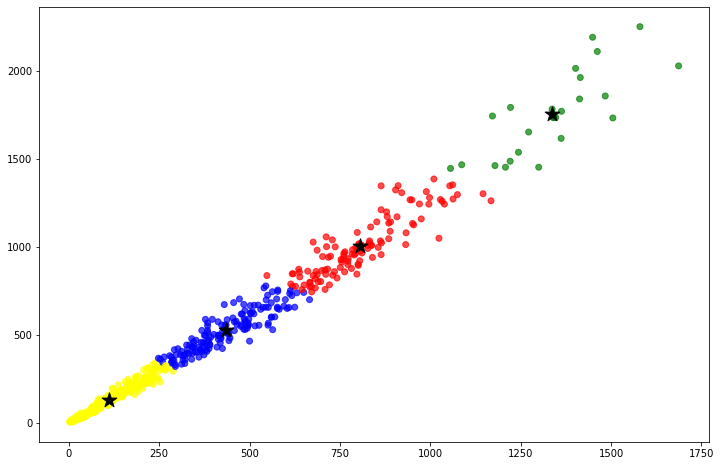

In [44]:
X = new_df.iloc[:, 1:3].to_numpy()
labels = kmeans_1.predict(X)
center = kmeans_1.cluster_centers_
colors = ["yellow","red","blue","green"]
asignar=[]
for row in labels:
    asignar.append(colors[row])

plt.figure(figsize=(12,8))
feature_1 = X[:,0]
feature_2 = X[:,1]
plt.scatter(feature_1, feature_2, c=asignar, alpha=.7)
plt.scatter(center[:, 0], center[:, 1],marker = "*",c='black',s=240)
plt.show()

In [54]:
cluster_3  = new_df[new_df['cluster'] == 3]
cluster_3.head()

,Player,FGA,PTS,cluster
6,LaMarcus Aldridge\aldrila01,1347,1735,3
15,Giannis Antetokounmpo\antetgi01,1402,2014,3
34,Harrison Barnes\barneha02,1208,1452,3
40,Bradley Beal\bealbr01,1484,1857,3
148,Anthony Davis\davisan02,1462,2110,3


In [55]:
cluster_3['Player'].unique()

array(['LaMarcus Aldridge\\aldrila01', 'Giannis Antetokounmpo\\antetgi01',
       'Harrison Barnes\\barneha02', 'Bradley Beal\\bealbr01',
       'Anthony Davis\\davisan02', 'DeMar DeRozan\\derozde01',
       'Kevin Durant\\duranke01', 'Joel Embiid\\embiijo01',
       'Paul George\\georgpa01', 'James Harden\\hardeja01',
       'Tobias Harris\\harrito02', 'Jrue Holiday\\holidjr01',
       'Kyrie Irving\\irvinky01', 'LeBron James\\jamesle01',
       'Damian Lillard\\lillada01', 'CJ McCollum\\mccolcj01',
       'Khris Middleton\\middlkh01', 'Donovan Mitchell\\mitchdo01',
       'Victor Oladipo\\oladivi01', 'Klay Thompson\\thompkl01',
       'Karl-Anthony Towns\\townska01', 'Kemba Walker\\walkeke02',
       'Russell Westbrook\\westbru01', 'Andrew Wiggins\\wiggian01',
       'Lou Williams\\willilo02'], dtype=object)

In [ ]:
#Clusterizacion enfocados en rebotes y bloqueos

In [56]:
new_df1 = nba[['Player', 'TRB', 'BLK']]

In [57]:
kmeans_2 = kmeans.fit(new_df1.loc[:, ['TRB', 'BLK']])

In [58]:
pred_kmeans_2 = kmeans.predict(nba[cols].loc[:, ['TRB', 'BLK']])

In [59]:
new_df1['cluster'] = pred_kmeans_2
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,cluster_kmeans_1,cluster
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,8,1134,115,291,...,88,114,28,38,8,25,124,353,0,2
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,8,1359,130,365,...,217,257,57,33,29,60,149,411,0,2
2,3,Steven Adams\adamsst01,C,24,OKC,76,76,2487,448,712,...,301,685,88,92,78,128,215,1056,1,1
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,1368,174,340,...,263,381,101,32,41,66,138,477,0,2
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,3,682,65,162,...,62,66,30,4,9,21,56,179,2,0


In [60]:
new_df1['cluster'].value_counts()

0    271
2    186
1     84
3     20
Name: cluster, dtype: int64

In [61]:
new_df1.groupby(['cluster']).agg({'mean', 'max', 'min', 'std'})

TRB                               BLK                    
               mean         std  min   max       mean        std min  max
cluster                                                                  
0         56.387454   41.114939    0   139   5.424354   5.804277   0   43
1        436.333333   66.628141  330   592  48.071429  25.936338  10  119
2        222.978495   55.792662  140   331  24.462366  17.749646   0  115
3        764.950000  161.938089  617  1247  91.050000  39.645103  20  193

In [62]:
new_df1.head()

,Player,TRB,BLK,cluster
0,Alex Abrines\abrinal01,114,8,0
1,Quincy Acy\acyqu01,257,29,2
2,Steven Adams\adamsst01,685,78,3
3,Bam Adebayo\adebaba01,381,41,1
4,Arron Afflalo\afflaar01,66,9,0


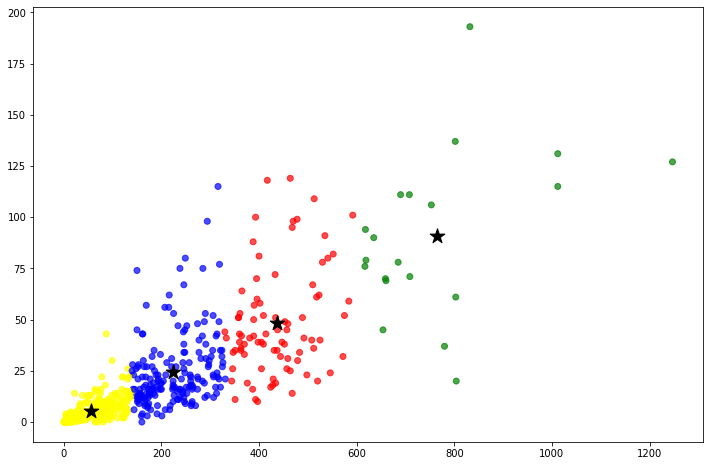

In [70]:
X = new_df1.iloc[:, 1:3].to_numpy()
labels = kmeans_2.predict(X)
center = kmeans_2.cluster_centers_
colors = ["yellow","red","blue","green"]
asignar=[]
for row in labels:
    asignar.append(colors[row])

plt.figure(figsize=(12,8))
feature_1 = X[:,0]
feature_2 = X[:,1]
plt.scatter(feature_1, feature_2, c=asignar, alpha=.7)
plt.scatter(center[:, 0], center[:, 1],marker = "*",c='black',s=240)
plt.show()

In [66]:
cluster_3  = new_df1[new_df1['cluster'] == 2]
cluster_3.head()

,Player,TRB,BLK,cluster
1,Quincy Acy\acyqu01,257,29,2
13,Ryan Anderson\anderry01,331,21,2
17,OG Anunoby\anunoog01,184,14,2
19,Trevor Ariza\arizatr01,294,13,2
25,D.J. Augustin\augusdj01,160,0,2


In [67]:
Russell_Westbrook = new_df1.loc[new_df1['Player'] == 'Russell Westbrook\westbru01', :]
Russell_Westbrook 

,Player,TRB,BLK,cluster
625,Russell Westbrook\westbru01,804,20,3
